In [1]:
print("Hi--- This is Test")

Hi--- This is Test


In [1]:
def create_flexibility_atlas(atlas1, atlas2, atlas3, atlas4, atlas5):
    """
    Creates a new atlas containing the flexibility of voxels from five other atlases.

    Parameters:
        atlas1, atlas2, atlas3, atlas4, atlas5: 2D binary matrices representing the five atlases.

    Returns:
        new_atlas: 2D matrix representing the new atlas containing voxel flexibility.
    """
    # Check that the dimensions of all input atlases are the same
    assert len(atlas1) == len(atlas2) == len(atlas3) == len(atlas4) == len(atlas5), "All atlases must have the same dimensions"
    assert len(atlas1[0]) == len(atlas2[0]) == len(atlas3[0]) == len(atlas4[0]) == len(atlas5[0]), "All atlases must have the same dimensions"

    rows, cols = len(atlas1), len(atlas1[0])
    new_atlas = [[0 for _ in range(cols)] for _ in range(rows)]

    for i in range(rows):
        for j in range(cols):
            # Calculate the sum of existing voxels from the five atlases
            total = atlas1[i][j] + atlas2[i][j] + atlas3[i][j] + atlas4[i][j] + atlas5[i][j]
            
            # Calculate the average and update the value in the new atlas
            new_atlas[i][j] = total / 5.0 if total > 0 else 0

    return new_atlas

# Example usage:
atlas1 = [[1, 0, 1],
          [0, 1, 0],
          [1, 1, 0]]

atlas2 = [[0, 1, 0],
          [0, 0, 1],
          [0, 1, 0]]

atlas3 = [[1, 0, 0],
          [1, 0, 1],
          [0, 0, 1]]

atlas4 = [[0, 1, 0],
          [0, 0, 0],
          [1, 0, 1]]

atlas5 = [[1, 0, 0],
          [0, 1, 1],
          [1, 0, 0]]

new_atlas = create_flexibility_atlas(atlas1, atlas2, atlas3, atlas4, atlas5)
print(new_atlas)


[[0.6, 0.4, 0.2], [0.2, 0.4, 0.6], [0.6, 0.4, 0.4]]


In [ ]:
import nibabel as nib
import numpy as np

def load_nii_image(filename):
    img = nib.load(filename)
    data = img.get_fdata()
    return data

def calculate_new_atlas(atlas_filenames):
    atlases_data = [load_nii_image(filename) for filename in atlas_filenames]
    new_atlas_data = np.zeros_like(atlases_data[0])

#     for i, atlas_data in enumerate(atlases_data):
#         new_atlas_data = new_atlas_data + atlas_data * (atlas_data > 0)

#     new_atlas_data /= len(atlases_data)

    return new_atlas_data

def save_nii_image(filename, data, reference_img):
    new_img = nib.Nifti1Image(data, reference_img.affine)
    nib.save(new_img, filename)

    
atlas_file1='Old_ATLASES\K_resampled_Yeo7-6RSNs_atlas.nii.gz'
atlas_file2='Old_ATLASES\K_resampled_CradCC400-6RSNs_atlas.nii.gz'
atlas_file3='Old_ATLASES\K_resampled_Power-6RSNs_atlas.nii.gz'
atlas_file4='Old_ATLASES\K_resampled_Shafer-6RSNs_atlas.nii.gz'
atlas_file5='Old_ATLASES\K_resampled_CradCC200-6RSNs_atlas.nii.gz'

# Replace the file paths with the actual file paths of your atlases
atlas_filenames = [atlas_file1, atlas_file2, atlas_file3, atlas_file4, atlas_file5]
new_atlas_data = calculate_new_atlas(atlas_filenames)

# Save the new atlas to a NIfTI file
reference_img = nib.load(atlas_filenames[0])
save_nii_image('new_atlas.nii', new_atlas_data, reference_img)


In [69]:
from nilearn import plotting
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.image import new_img_like
import nilearn.datasets as datasets

#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='Paired',
    title=Title )
    plotting.show()
    

def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
#     atlas_flat=atlas_flat.astype(int)
    
#     atlas_flat[atlas_flat > 0]= 1
#     atlas_flat[atlas_flat < 0]= 0
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]
    print(f" Atlas Dim={atlas_img.shape}")
    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
#     index = 0
#     if uniq_labels[index]==0:
#         uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
#     unique, counts = np.unique(atlas_flat, return_counts=True)
#     result = dict(zip(unique, counts))
#     print(f"result={result}")
#     ---------------------------------------------------------
    atlas_flat = atlas_flat[atlas_flat != 0]  # Remove value 0
    unique, counts = np.unique(atlas_flat, return_counts=True)

    total_count = len(atlas_flat)
    result = dict(zip(unique, counts))

    totalPer=0.0
    for value, count in result.items():
        percentage = (count / total_count) * 100
        print(f"Value: {value}, Occurrences: {count}, Percentage: {percentage:.2f}%")
        totalPer +=percentage
        
    print(f" Sum of Percentages={totalPer}")
    
    
    
# F='ATLASES/FlexibilityAtlas.nii.gz'
# F='CAREN-1/CAREN_Confidence_Percentage.nii'
# F='CAREN-1/CAREN_5RSNS.nii'
# F='Org_Atlases/Yeo2011_7Networks_thick_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz'
# F='Org_Atlases/Schaefer2018_100Parcels_17Networks_order_FSLMNI152_1mm.nii.gz'
# F='HexaNet_ATLAS.nii.gz'
F='auditory_association-test_z_FDR_0.01.nii.gz' #'AUN-anatomical.nii.gz'
# plotting_image(F," AUN")
# Display_Img_Labels(F)

In [68]:
import numpy as np

atlas_flat = np.array([0,0,0,0,1, 2, 2, 3, 1, 4, 4, 4, 5, 5,0])  # Replace this with your actual data
atlas_flat = atlas_flat[atlas_flat != 0]  # Remove value 0

unique, counts = np.unique(atlas_flat, return_counts=True)

total_count = len(atlas_flat)
result = dict(zip(unique, counts))

totalPer=0.0
for value, count in result.items():
    percentage = (count / total_count) * 100
    print(f"Value: {value}, Occurrences: {count}, Percentage: {percentage:.2f}%")
    totalPer +=percentage
print(f" Sum of Percentages={totalPer}")

Value: 0, Occurrences: 5, Percentage: 33.33%
Value: 1, Occurrences: 2, Percentage: 13.33%
Value: 2, Occurrences: 2, Percentage: 13.33%
Value: 3, Occurrences: 1, Percentage: 6.67%
Value: 4, Occurrences: 3, Percentage: 20.00%
Value: 5, Occurrences: 2, Percentage: 13.33%
 Sum of Percentages=100.0


In [12]:
# import nibabel as nib

# #----- function for plotting-------------------
# def plotting_image(img,Title):
#     plotting.plot_stat_map(
#     img, cmap='Paired',
#     title=Title )
#     plotting.show()
    

# def remove_4th_dimension(nii_file_path):
#     # Load the NIfTI file
#     img = nib.load(nii_file_path)
    
    
#     # Get the data array from the image
#     data = img.get_fdata()

#     # Ensure the data array has the correct shape (X, Y, Z, 1)
#     if len(data.shape) != 4 or data.shape[3] != 1:
#         raise ValueError("The input NIfTI file doesn't have the expected shape (X, Y, Z, 1).")
    
#     # Remove the 4th dimension (squeeze it)
#     data = data.squeeze(axis=3)
    
#     # Create a new NIfTI image with the updated data
#     new_img = nib.Nifti1Image(data, img.affine, img.header)
    
#     # Save the modified NIfTI back to the same file
#     nib.save(new_img, nii_file_path)

# # Example usage:
# atlas_file1='Old_ATLASES\K_resampled_Yeo7-6RSNs_atlas.nii.gz'
# remove_4th_dimension(atlas_file1)


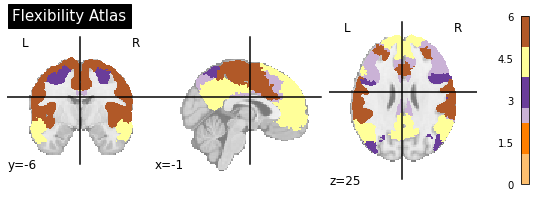

 Atlas Dim=(182, 218, 182)
Old_ATLASES\K_resampled_Yeo7-6RSNs_atlas.nii.gz
no_of_labels = 2
uniqe labels = [0 1]
No. of Non-Zero Voxels = 784216
Size of brain Atlas (No. of Voxels) = 7221032


In [37]:
plotting_image(atlas_file1,"Flexibility Atlas")
Display_Img_Labels(atlas_file1)

Atlas Name=Flexibility\K_resampled_Yeo7-6RSNs_atlas.nii.gz Size=(182, 218, 182)
Atlas Name=Flexibility\K_resampled_CradCC400-6RSNs_atlas.nii.gz Size=(182, 218, 182)
Atlas Name=Flexibility\K_resampled_Shafer-6RSNs_atlas.nii.gz Size=(182, 218, 182)
Atlas Name=Flexibility\K_resampled_CradCC200-6RSNs_atlas.nii.gz Size=(182, 218, 182)
[ True  True  True ...  True  True  True]


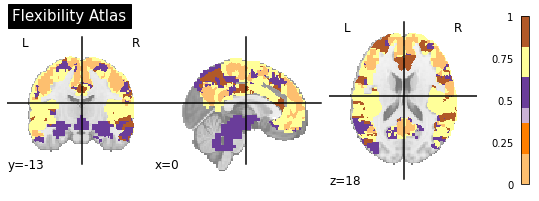

 Atlas Dim=(182, 218, 182)
Flexibility\Flex_Voxel_without_POWER.nii.gz
no_of_labels = 6
uniqe labels = [0.         0.01       0.5        0.66666667 0.83333333 1.        ]
No. of Non-Zero Voxels = 994828
Size of brain Atlas (No. of Voxels) = 7221032
result={0.0: 6226204, 0.01: 224277, 0.5: 264252, 0.6666666666666666: 364896, 0.8333333333333334: 133867, 1.0: 7536}


In [24]:
import numpy as np
from nilearn import plotting
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.image import new_img_like
import nilearn.datasets as datasets
import nibabel as nib
import numpy as np

def load_nii_image(filename):
    img = nib.load(filename)
    data = img.get_fdata()
    # Convert 4-dim to a 3-dimensional array
    if data.ndim == 4:
        data = data.squeeze()
    print(f"Atlas Name={filename} Size={data.shape}")
    return data
# --------------------------------------------------------------------

def Convert_3DAtlases_2_Rows(atlas_filenames):
    AtlasesList = [load_nii_image(filename) for filename in atlas_filenames]
   # Stack the 5 atlases together to create a 4D array (5, 3, 3, 3)
    # atlas_4d = np.stack([atlas_1, atlas_2, atlas_3, atlas_4, atlas_5])
    atlas_4d = np.stack([at for at in AtlasesList])

    N=len(atlas_filenames)
    # Flatten each 3D atlas to create a 1D array for each atlas
    atlas_1d = atlas_4d.reshape(N, -1)

    # Print the 1D array representation of each atlas
#     for i, atlas in enumerate(atlas_1d):
#         print(f"Atlas {i + 1} - 1D Array:")
#         print(atlas)
#         print()

    # Optionally, if you want to put each 1D array in a 2D array as rows
    atlas_2d = np.vstack(atlas_1d)

    # Print the 2D array with each atlas as a row
#     print("2D Array with Each Atlas as a Row:")
#     print(atlas_2d)
    return atlas_2d
# ---------------------------------------------------------------------------------------------
# Function to check if all values at a particular location are 0
def all_zeros(values):
    return all(val == 0 for val in values)

# Function to replace all 0s with -1 in a list
def replace_zeros_with_neg1(values):
    return [-1 if val == 0 else val for val in values]

# ----------------------------------------------------------------------------------------------------
# Assuming 'S' is a 2D numpy array with numSlices rows and columns
def flexibility_Voxels(S):
    
    numSlices = S.shape[0]  # Assuming 'numSlices' is known or defined elsewhere
    totalChanges = np.zeros(S.shape[1])  # Initialize totalChanges with zeros

    # Preprocessing step to check and replace all-zero locations with -1
    all_zero_location = np.all(S == 0, axis=0)
    S[:, all_zero_location] = -1

    
    for s in range(numSlices):
#         print('-----------------------------------------------')
#         print(f"s={s}")
        otherSlices = np.arange(numSlices) + 1
#         print(f"1otherSlices={otherSlices}")
        otherSlices = otherSlices[otherSlices != (s + 1)]  # All slices but the current one
#         print(f"2otherSlices={otherSlices}")
        totalChanges += np.sum(S[s, :] != S[otherSlices - 1, :], axis=0)
#         print(f"sum={np.sum(S[s, :] != S[otherSlices - 1, :], axis=0)}")
#         print(f"totalChanges={totalChanges}")
#     print(totalChanges)
    finalArr=totalChanges/(numSlices*(numSlices-1))
#     print(finalArr)
    finalArr[finalArr==0]=0.01
    print(all_zero_location)
    finalArr[all_zero_location] = 0
    return finalArr
# ------------------------------------------------------------------------------------------------------
def save_nii_image(filename, data, reference_file):
    reference_img= nib.load(reference_file)
    data= data.reshape(reference_img.shape)
    new_img = nib.Nifti1Image(data, reference_img.affine)
    nib.save(new_img, filename)
# ========================================================================================================

atlas_file1='Flexibility\K_resampled_Yeo7-6RSNs_atlas.nii.gz'
atlas_file2='Flexibility\K_resampled_CradCC400-6RSNs_atlas.nii.gz'
atlas_file3='Flexibility\K_resampled_Power-6RSNs_atlas.nii.gz'
atlas_file4='Flexibility\K_resampled_Shafer-6RSNs_atlas.nii.gz'
atlas_file5='Flexibility\K_resampled_CradCC200-6RSNs_atlas.nii.gz'

# Replace the file paths with the actual file paths of your atlases
atlas_filenames = [atlas_file1, atlas_file2, atlas_file4, atlas_file5] #atlas_file3,
# AtList=[atlas_1,atlas_2,atlas_3,atlas_4,atlas_5]

S_2D=Convert_3DAtlases_2_Rows(atlas_filenames)

F_data=flexibility_Voxels(S_2D)

reference_file=atlas_file5
FName='Flexibility\Flex_Voxel_without_POWER.nii.gz'
save_nii_image(FName, F_data, reference_file)

plotting_image(FName,"Flexibility Atlas")
Display_Img_Labels(FName)


In [25]:
# Your dictionary
my_dict ={0.0: 6226204, 0.01: 224277, 0.5: 264252, 0.6666666666666666: 364896, 0.8333333333333334: 133867, 1.0: 7536}

# Remove key 0.0
my_dict.pop(0.0)

# Calculate the sum of values
total_sum = sum(my_dict.values())

# Calculate and print the percentage of each value
for key, value in my_dict.items():
    percentage = ((value / total_sum) * 100)
    print(f"Key {key} Percentage={percentage}%")


Key 0.01 Percentage=22.5442991150229%
Key 0.5 Percentage=26.562581672409703%
Key 0.6666666666666666 Percentage=36.67930536735999%
Key 0.8333333333333334 Percentage=13.456295962719183%
Key 1.0 Percentage=0.7575178824882292%


In [8]:
import numpy as np

a = np.array([0, 3, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 3, 4])
unique, counts = np.unique(a, return_counts=True)
result = dict(zip(unique, counts))

print(result)

{0: 7, 1: 4, 2: 1, 3: 2, 4: 1}


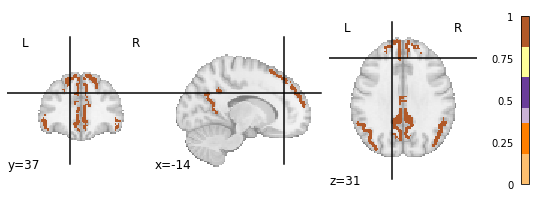

 Atlas Dim=(91, 109, 91)
CAREN_byAALRegion_Combined/4_CAREN_R4_DMN_4thRSN.nii.gz
no_of_labels = 2
uniqe labels = [0 1]
No. of Non-Zero Voxels = 9952
Size of brain Atlas (No. of Voxels) = 902629


In [8]:
# FName='CAREN_byAALRegion_Combined/666_HexaNet_CRN_Atlas_6RSNs.nii.gz'
# FName='HexaNet_ATLAS.nii.gz'
FName='CAREN_byAALRegion_Combined/4_CAREN_R4_DMN_4thRSN.nii.gz'
plotting_image(FName,"")
Display_Img_Labels(FName)

In [31]:
S=np.array([[0,1,2,3,4,5,6,0],
            [0,1,2,0,4,5,0,0],
            [0,1,2,3,0,5,3,0]])
F_data=flexibility_Voxels(S)
print(f"flexibility={F_data}")

[ True False False False False False False  True]
flexibility=[0.         0.01       0.01       0.66666667 0.66666667 0.01
 1.         0.        ]


In [3]:
import os
def Get_files_from_Dir(folder_path):
  # Check if the specified path exists and is a directory
  if os.path.exists(folder_path) and os.path.isdir(folder_path):
    # List all files in the directory
    files = os.listdir(folder_path)
    # Filter out only files (excluding subdirectories)
    files = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]
    return files

dir=r'E:\دراسات عليا'
fs=Get_files_from_Dir(dir)
print(fs)

['جدول الدروس الاسبوعي للدراسات العليا.docx', 'جدول الدروس الاسبوعي للدراسات العليا.pdf']


In [11]:
import numpy as np
def fisher(correlation):
    z = 0.5 * (np.log(1 + correlation) - np.log(1 - correlation))
    return z

print(f"corr={1} fisher z={fisher(1)}")
print(f"corr={0.999} fisher z={fisher(0.999)}")
print(f"corr={0.9} fisher z={fisher(0.9)}")
print(f"corr={0.05} fisher z={fisher(0.05)}")
print(f"corr={0.005} fisher z={fisher(0.005)}")
print(f"corr={0} fisher z={fisher(0)}")
print(f"corr={-1} fisher z={fisher(-1)}")
print(f"corr={-0.9} fisher z={fisher(-0.9)}")
print(f"corr={-0.999} fisher z={fisher(-0.999)}")

corr=1 fisher z=inf
corr=0.999 fisher z=3.8002011672501994
corr=0.9 fisher z=1.4722194895832204
corr=0.05 fisher z=0.050041729278491306
corr=0.005 fisher z=0.005000041667291627
corr=0 fisher z=0.0
corr=-1 fisher z=-inf
corr=-0.9 fisher z=-1.4722194895832204
corr=-0.999 fisher z=-3.8002011672501994


C:\Users\IT-Department\AppData\Local\Temp\ipykernel_15172\577798628.py:3: RuntimeWarning: divide by zero encountered in log
  z = 0.5 * (np.log(1 + correlation) - np.log(1 - correlation))


In [31]:
# # ------------------ Consistency Voxels for testing -----------------------
# import numpy as np
# import time

# def Consistency_Voxels_binary(atlas_labels):
#     N= len(atlas_labels)
#     P_matrix = np.zeros((N, N), dtype=np.float16)
#     for i in range(N):
#             for j in range(i, N):  # Assuming a symmetric matrix, so only compute half
#                 # Check if voxel i and voxel j have the same label in the current atlas
#                 if atlas_labels[i] == atlas_labels[j]:
#                     label=1
#                     # Set binary probability to 1 if in the same network, otherwise 0
#                     P_matrix[i, j] = label
#                     P_matrix[j, i] = label
#                 else:
#                     label=0
#                     # Set binary probability to 1 if in the same network, otherwise 0
#                     P_matrix[i, j] = label
#                     P_matrix[j, i] = label
                    
#     print(f"{P_matrix}")
#     return P_matrix
# # =========================================================================

# def Consistency_Voxels_binary_optimize(atlas_labels):
#     N = len(atlas_labels)
#     P_matrix = np.zeros((N, N), dtype=np.float16)

#     # Compute upper triangular part of the matrix
#     for i in range(N):
#         for j in range(i, N):
#             P_matrix[i, j] = atlas_labels[i] == atlas_labels[j]

#     # Mirror values to the lower triangular part
#     P_matrix = np.triu(P_matrix) + np.triu(P_matrix, 1).T

#     print(P_matrix)
#     return P_matrix
# # ----------------------------------------------------------------
# def Consistency_Voxels_binary_optimize_2(atlas_labels):
    
#     N = len(atlas_labels)
#     P_matrix = np.equal.outer(atlas_labels, atlas_labels).astype(np.float16)
#     print(f"P1=\n{P_matrix}")
#     # Mirror values to the lower triangular part
# #     P_matrix = np.triu(P_matrix) + np.triu(P_matrix, 1).T

    
# #     print(f"P2={P_matrix}")
#     return P_matrix
# # -----------------------------------------------------------------------------------------
# def Create_P_Matrix(ATLASES_List):
#     # Initialize an empty list to store the matrices

# #     matricesB = [] 
#     matricesB_2=[]
#     # Compute binary probabilities and populate the P-matrix
#     for idx, atlas in enumerate(ATLASES_List):
#         # Generate labels for the current atlas
#         atlas_labels = atlas
#         start_time = time.time()
# #         P_matrixB=Consistency_Voxels_binary(atlas_labels)
#         P_matrixB_2=Consistency_Voxels_binary_optimize_2(atlas_labels) #_optimize
#         end_time = time.time()
#         elapsed_time = end_time - start_time
#         print(f"Execution time: {elapsed_time} seconds")
# #         PLP_matrixB=parallel_consistency_voxels_binary(atlas_labels)
        
# #         matricesB.append(P_matrixB)
#         matricesB_2.append(P_matrixB_2)
# #         Parallelmtx.append(PLP_matrixB)
    
#     # Calculate the average matrix
# #     average_p_matrixB = np.mean(matricesB, axis=0)
#     average_p_matrixB_2 = np.mean(matricesB_2, axis=0)
# #     average_p_matrixPLP = np.mean(Parallelmtx, axis=0)
    
#     # Set the display precision to 2 digits
#     np.set_printoptions(precision=2)
# #     print(f"average p_matrtix Binary\n{average_p_matrixB}")
# #     print(f"average p_matrtix Binary Optimize 2\n{average_p_matrixB_2}")
# #     print(f"Parallel p_matrtix Binary\n{average_p_matrixPLP}")

# #     return average_p_matrixPLP,average_p_matrixB
#     return average_p_matrixB_2 #,average_p_matrixB
    
# ATLAS_List=[
#     [1,1,2,2,2,3,4,4,1,1],
#     [1,1,1,2,2,3,3,4,2,1],
#     [1,1,2,2,2,3,3,4,3,2],
#     [1,1,2,2,2,3,3,4,4,1]
#             ]
# average_p_matrixB_2=Create_P_Matrix(ATLAS_List)   #,average_p_matrixB
# print(f"average=\n{average_p_matrixB_2}")
# for idx, atlas in enumerate(ATLAS_List):
#     print(atlas)

In [32]:

# def Consistency_Voxels_binary(atlas_labels):
#     N= len(atlas_labels)
#     P_matrix = np.zeros((N, N), dtype=np.float16)
#     for i in range(N):
#             for j in range(i, N):  # Assuming a symmetric matrix, so only compute half
#                 # Check if voxel i and voxel j have the same label in the current atlas
#                 if atlas_labels[i] == atlas_labels[j]:
#                     label=1
#                     # Set binary probability to 1 if in the same network, otherwise 0
#                     P_matrix[i, j] = label
#                     P_matrix[j, i] = label
#                 else:
#                     label=0
#                     # Set binary probability to 1 if in the same network, otherwise 0
#                     P_matrix[i, j] = label
#                     P_matrix[j, i] = label
                    
#     print(f"{P_matrix}")
#     return P_matrix
# # =========================================================================

# def Consistency_Voxels_binary_optimize(atlas_labels):
#     N = len(atlas_labels)
#     P_matrix = np.zeros((N, N), dtype=np.float16)

#     # Compute upper triangular part of the matrix
#     for i in range(N):
#         for j in range(i, N):
#             P_matrix[i, j] = atlas_labels[i] == atlas_labels[j]

#     # Mirror values to the lower triangular part
#     P_matrix = np.triu(P_matrix) + np.triu(P_matrix, 1).T

#     print(P_matrix)
#     return P_matrix
# # ----------------------------------------------------------------
# def Consistency_Voxels_binary_optimize_2(atlas_labels):
    
#     N = len(atlas_labels)
#     P_matrix = np.equal.outer(atlas_labels, atlas_labels).astype(np.float16)

#     # Mirror values to the lower triangular part
#     P_matrix = np.triu(P_matrix) + np.triu(P_matrix, 1).T

    
#     print(P_matrix)
#     return P_matrix

# # Generate a random list of 1000 integers between 1 and 10 (inclusive)
# atlas_labels = np.random.randint(1, 11, size=9000)
# start_time = time.time()
# Consistency_Voxels_binary_optimize_2(atlas_labels)
# end_time = time.time()
# elapsed_time = end_time - start_time
# print(f"Execution time: {elapsed_time} seconds")


In [33]:
# without--Execution time: 0.5254855155944824 seconds         Execution time: 39.83117461204529 seconds
# opt----- Execution time: 0.4016134738922119 seconds         Execution time: 36.09950876235962 seconds
# opt2 --- Execution time: 0.025864362716674805 seconds       Execution time: 3.062812328338623 seconds
    


In [ ]:
# # ------------------ Consistency_Voxels-------------
# import numpy as np
# from scipy.sparse import lil_matrix



# # Generate random binary probability values for illustration
# # You should replace this with your actual computation function
# def your_computation_function():
#     return np.random.rand()
# def Consistency_Voxels_Label(atlas_labels):
#     N= len(atlas_labels)
# #     P_matrix = np.float32(np.zeros((N, N)))
# #     P_matrix = np.zeros((N, N), dtype=np.float32)
#     P_matrix = lil_matrix((N, N), dtype=np.float32)
#     for i in range(N):
#             for j in range(i, N):  # Assuming a symmetric matrix, so only compute half
#                 # Check if voxel i and voxel j have the same label in the current atlas
#                 if atlas_labels[i] == atlas_labels[j]:
#                     label=atlas_labels[i]
#                     # Set binary probability to 1 if in the same network, otherwise 0
#                     P_matrix[i, j] = label
#                     P_matrix[j, i] = label
# #     P_matrix = np.where(P_matrix > 0, 1, 0)
#     print(f"{P_matrix}")
#     return P_matrix
# # ------------------------------------------------------------------
# def Consistency_Voxels_binary(atlas_labels):
#     N= len(atlas_labels)
# #     P_matrix = np.float32(np.zeros((N, N)))
#     P_matrix = np.zeros((N, N), dtype=np.float16)
#     for i in range(N):
#             for j in range(i, N):  # Assuming a symmetric matrix, so only compute half
#                 # Check if voxel i and voxel j have the same label in the current atlas
#                 if atlas_labels[i] == atlas_labels[j]:
#                     label=1
#                     # Set binary probability to 1 if in the same network, otherwise 0
#                     P_matrix[i, j] = label
#                     P_matrix[j, i] = label
#                 else:
#                     label=0
#                     # Set binary probability to 1 if in the same network, otherwise 0
#                     P_matrix[i, j] = label
#                     P_matrix[j, i] = label
                    
# #     P_matrix = np.where(P_matrix > 0, 1, 0)
#     print(f"{P_matrix}")
#     return P_matrix
# # -----------------------------------------------------------------------------
# # def Consistency_Voxels_binary_Optimize(atlas_labels):
# #     N = len(atlas_labels)
# #     P_matrix = np.zeros_like(np.outer(atlas_labels, atlas_labels), dtype=np.float32)

# #     for i in range(N):
# #         P_matrix[i, i:] = (atlas_labels[i:] == atlas_labels[i]).astype(np.float32)
# #         P_matrix[i, i:] = P_matrix[i, i:][::-1]  # make the matrix symmetric

# #     print(f"Optimize\n{P_matrix}")
# #     return P_matrix

# # -------------------------------------------------------------------------
# def Create_P_Matrix(ATLASES_List):
#     # Initialize an empty list to store the matrices
# #     matricesL = [] 
#     matricesB = [] 
#     # Compute binary probabilities and populate the P-matrix
#     for idx, atlas in enumerate(ATLASES_List):
#         # Generate labels for the current atlas
#         atlas_labels = atlas
# #         print(f"-------------{idx}---------------------")
# #         print(f" Atlas={atlas}")

# #         P_matrixL=Consistency_Voxels_Label(atlas_labels)
#         P_matrixB=Consistency_Voxels_binary(atlas_labels)
# #         P_matrixB=Consistency_Voxels_binary_Optimize(np.array(atlas_labels))
#         # Add the matrix to the list
# #         matricesL.append(P_matrixL)
#         matricesB.append(P_matrixB)
    
#     # Calculate the average matrix
# #     average_p_matrixL = np.mean(matricesL, axis=0)
#     average_p_matrixB = np.mean(matricesB, axis=0)
#     # Set the display precision to 2 digits
#     np.set_printoptions(precision=2)
# #     print(f"average p_matrtix Label \n{average_p_matrixL}")
#     print(f"average p_matrtix Binary\n{average_p_matrixB}")
    
# #     return average_p_matrixL,average_p_matrixB
#     return [],average_p_matrixB
    
# ATLAS_List=[
#     [1,1,2,2,2,3,4,4,1,1],
#     [1,1,1,2,2,3,3,4,2,1],
#     [1,1,2,2,2,3,3,4,3,2],
#     [1,1,2,2,2,3,3,4,4,1]
#             ]
# average_p_matrixL,average_p_matrixB=Create_P_Matrix(ATLAS_List)

# # Extract the main diagonal
# # main_diagonalL = np.diag(average_p_matrixL)
# main_diagonalB = np.diag(average_p_matrixB)
# # Convert the main diagonal to a vector
# # diagonal_vectorL = np.ravel(main_diagonalL)
# diagonal_vectorB = np.ravel(main_diagonalB)

# # print(f"main_diagonal Label= {diagonal_vectorL}")
# print(f"main_diagonal Binary={diagonal_vectorB}")
# for idx, atlas in enumerate(ATLAS_List):
#     print(atlas)

In [48]:
import math, sys
import numpy as np



N=109350
# Generate a random list of 1000 integers between 1 and 10 (inclusive)
atlas_labels = np.random.randint(1, 11, size=N)

P_matrix = np.equal.outer(atlas_labels, atlas_labels).astype(np.float16)
siz=sys.getsizeof(P_matrix)

def bytes_to_gb(bytes):
    giga_bytes = bytes / (1024 ** 3)
    return giga_bytes

# Example usage:
num_bytes = siz #109350*109350                                                    # gigabytes in bytes
result = bytes_to_gb(num_bytes)
print(f"\n{num_bytes} bytes is equal to {result} gigabytes")


23914845128 bytes is equal to 22.272435136139393 gigabytes


In [2]:
import psutil
import gc


def Display_RAM_Usage():
    
    # Get memory usage
    memory = psutil.virtual_memory()

#     print(f"Total Memory: {memory.total / (1024 ** 3):.2f} GB")
#     print(f"Available Memory: {memory.available / (1024 ** 3):.2f} GB")
#     print(f"Used Memory: {memory.used / (1024 ** 3):.2f} GB")
    print(f"Memory Usage Percentage: {memory.percent:.2f}%")

Display_RAM_Usage()

gc.collect()

Display_RAM_Usage()

Memory Usage Percentage: 15.30%
Memory Usage Percentage: 15.30%


In [5]:
# ---------------- Pre for Real Atlases ----------------------------------
import numpy as np
import math, sys, time

def Consistency_Voxels_binary_optimize_2(atlas_labels):
    
    N = len(atlas_labels)
    P_matrix = np.equal.outer(atlas_labels, atlas_labels).astype(np.float16)
#     print(f"P1=\n{P_matrix}")
    # Mirror values to the lower triangular part
#     P_matrix = np.triu(P_matrix) + np.triu(P_matrix, 1).T

    return P_matrix
# -----------------------------------------------------------------------------------------
def Create_P_Matrix(ATLASES_List):
    # Initialize an empty list to store the matrices


    matricesB_2=[]
    # Compute binary probabilities and populate the P-matrix
    for idx, atlas in enumerate(ATLASES_List):
        # Generate labels for the current atlas
        start_time = time.time()
        
        atlas_labels = atlas
        Display_RAM_Usage()
        P_matrixB_2=Consistency_Voxels_binary_optimize_2(atlas_labels) #_optimize
        Display_RAM_Usage()
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"Execution time: {elapsed_time} seconds")

        matricesB_2.append(P_matrixB_2)

    average_p_matrixB_2 = np.mean(matricesB_2, axis=0)
    # Set the display precision to 2 digits
    np.set_printoptions(precision=2)
#     print(f"average p_matrtix Binary Optimize 2\n{average_p_matrixB_2}")

    return average_p_matrixB_2
# =====================================================================
def Create_P_Matrix_OptimizeMem(ATLASES_List):
    # Initialize an empty list to store the matrices
    # Initialize the sum matrix as an array of integers with one byte size
    N = len(ATLASES_List[0])
    print(f"N={N}")
    sum_matrixB_2 = np.zeros((N, N), dtype=np.float16)

    # Compute binary probabilities and accumulate in the sum matrix
    for idx, atlas in enumerate(ATLASES_List):
        atlas_labels = atlas
        P_matrixB_2 = Consistency_Voxels_binary_optimize_2(atlas_labels)
        sum_matrixB_2 = np.add(sum_matrixB_2, P_matrixB_2, dtype=np.float16)
#         print(f"temp=\n{sum_matrixB_2}")
        
    # Calculate the average matrix
    average_p_matrixB_2 = sum_matrixB_2 / len(ATLASES_List)
#     print(f"t=\n{average_p_matrixB_2}")
    return average_p_matrixB_2

# ==========================================================================

ATLAS_List=[
    [1,1,2,2,2,3,4,4,1,1],
    [1,1,1,2,2,3,3,4,2,1],
    [1,1,2,2,2,3,3,4,3,2],
    [1,1,2,2,2,3,3,4,4,1]
            ]

average_p_matrixB_2=Create_P_Matrix(ATLAS_List) 
print(f"average P2=\n{average_p_matrixB_2}")

average_p_matrixB_4=Create_P_Matrix_OptimizeMem(ATLAS_List) 
print(f"average P4=\n{average_p_matrixB_4}")

for idx, atlas in enumerate(ATLAS_List):
    print(atlas)

Memory Usage Percentage: 15.20%
Memory Usage Percentage: 15.20%
Execution time: 0.0 seconds
Memory Usage Percentage: 15.20%
Memory Usage Percentage: 15.20%
Execution time: 0.0 seconds
Memory Usage Percentage: 15.20%
Memory Usage Percentage: 15.20%
Execution time: 0.0 seconds
Memory Usage Percentage: 15.20%
Memory Usage Percentage: 15.20%
Execution time: 0.0 seconds
average P2=
[[1.   1.   0.25 0.   0.   0.   0.   0.   0.25 0.75]
 [1.   1.   0.25 0.   0.   0.   0.   0.   0.25 0.75]
 [0.25 0.25 1.   0.75 0.75 0.   0.   0.   0.   0.5 ]
 [0.   0.   0.75 1.   1.   0.   0.   0.   0.25 0.25]
 [0.   0.   0.75 1.   1.   0.   0.   0.   0.25 0.25]
 [0.   0.   0.   0.   0.   1.   0.75 0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.75 1.   0.25 0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 1.   0.25 0.  ]
 [0.25 0.25 0.   0.25 0.25 0.25 0.25 0.25 1.   0.25]
 [0.75 0.75 0.5  0.25 0.25 0.   0.   0.   0.25 1.  ]]
N=10
average P4=
[[1.   1.   0.25 0.   0.   0.   0.   0.   0.25 0.75]
 [1.   1.   0.25 0.

In [6]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

def dendo_matrix(matrix):
    # Perform hierarchical clustering for the matrix
    linkage_matrix = sch.linkage(matrix, method='average')  # You can choose a different linkage method----  average  ward

    # Display dendrogram for the matrix
    plt.figure(figsize=(8, 6))
    sch.dendrogram(linkage_matrix, labels=np.arange(1, matrix.shape[0] + 1))
    plt.title('Hierarchical Clustering Dendrogram for Matrix')
    plt.xlabel('Matrix Index')
    plt.ylabel('Distance')
    plt.show()
    
    from scipy.cluster.hierarchy import fcluster

    # Cut the tree at a certain height to get clusters
    threshold_distance = 0.75  # Adjust this based on your dendrogram
    clusters = fcluster(linkage_matrix, t=threshold_distance, criterion='distance')

    # Display the clustered data
#     print("Cluster Assignments:", clusters)
    return clusters

    
def dendo_vector(vector):  
    # Reshape the vector to a matrix to use the same clustering code
    vector_as_matrix = vector.reshape(-1, 1)

    # Perform hierarchical clustering for the vector
    linkage_matrix_vector = sch.linkage(vector_as_matrix, method='average')  # You can choose a different linkage method

    # Display dendrogram for the vector
    plt.figure(figsize=(8, 4))
    sch.dendrogram(linkage_matrix_vector, labels=np.arange(1, vector.shape[0] + 1))
    plt.title('Hierarchical Clustering Dendrogram for Vector')
    plt.xlabel('Vector Index')
    plt.ylabel('Distance')
    plt.show()
    
# clusters=dendo_matrix(average_p_matrixB)
# print(f"clusters={clusters}")
# dendo_vector(diagonal_vector)

In [7]:
# ------------------------------ Consistancy Voxels of Real Atlases ---------------------
import numpy as np
from nilearn import plotting
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.image import new_img_like
import nilearn.datasets as datasets

#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='Paired',
    title=Title )
    plotting.show()
    

def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
#     atlas_flat=atlas_flat.astype(int)
    
#     atlas_flat[atlas_flat > 0]= 1
#     atlas_flat[atlas_flat < 0]= 0
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]
    print(f" Atlas Dim={atlas_img.shape}")
    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
#     index = 0
#     if uniq_labels[index]==0:
#         uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
#     unique, counts = np.unique(atlas_flat, return_counts=True)
#     result = dict(zip(unique, counts))
#     print(f"result={result}")
#     ---------------------------------------------------------
    atlas_flat = atlas_flat[atlas_flat != 0]  # Remove value 0
    unique, counts = np.unique(atlas_flat, return_counts=True)

    total_count = len(atlas_flat)
    result = dict(zip(unique, counts))

    totalPer=0.0
    for value, count in result.items():
        percentage = (count / total_count) * 100
        print(f"Value: {value}, Occurrences: {count}, Percentage: {percentage:.2f}%")
        totalPer +=percentage
        
    print(f" Sum of Percentages={totalPer}")
# -------------------------------------------------------------------------------------    

def load_nii_image(filename):
    img = nib.load(filename)
    data = img.get_fdata()
    # Convert 4-dim to a 3-dimensional array
    if data.ndim == 4:
        data = data.squeeze()
    print(f"Atlas Name={filename} Size={data.shape}")
    return data
# --------------------------------------------------------------------
import nilearn.image as nlimg

def Resample_Atlas_2_A444(ATLASES_List):
    for idx, AtlasFilename in enumerate(ATLASES_List):
        
        # Load the original brain atlas
        original_atlas_img = nib.load(AtlasFilename)  # Replace with your file path
        original_atlas_data = original_atlas_img.get_fdata()
        #--------------------------------------------------------------------------------
        RefAtlasFile= 'Flexibility\Master_mask111_HexaNet_ATLAS_res-4x4x4.nii.gz'
        Ref_img=nib.load(RefAtlasFile)
        resampled_atlas_img = nlimg.resample_to_img(original_atlas_img, Ref_img, interpolation='nearest')
        # -------------------------------------------------------------------------------
        # Replace only the first occurrence of "Hello" with "Hi"
        new_FileName = AtlasFilename.replace("atlas", "atlas444", 1)
        nib.save(resampled_atlas_img, new_FileName)  # Replace with your desired file path


def Convert_3DAtlases_2_Rows(atlas_filenames):
    AtlasesList = [load_nii_image(filename) for filename in atlas_filenames]
   # Stack the 5 atlases together to create a 4D array (5, 3, 3, 3)
    # atlas_4d = np.stack([atlas_1, atlas_2, atlas_3, atlas_4, atlas_5])
    atlas_4d = np.stack([at for at in AtlasesList])

    N=len(atlas_filenames)
    # Flatten each 3D atlas to create a 1D array for each atlas
    atlas_1d = atlas_4d.reshape(N, -1)

    # Print the 1D array representation of each atlas
#     for i, atlas in enumerate(atlas_1d):
#         print(f"Atlas {i + 1} - 1D Array:")
#         print(atlas)
#         print()

    # Optionally, if you want to put each 1D array in a 2D array as rows
    atlas_2d = np.vstack(atlas_1d)

    # Print the 2D array with each atlas as a row
#     print("2D Array with Each Atlas as a Row:")
#     print(atlas_2d)
    return atlas_2d
# ---------------------------------------------------------------------------------------------
# Function to check if all values at a particular location are 0
def all_zeros(values):
    return all(val == 0 for val in values)

# Function to replace all 0s with -1 in a list
def replace_zeros_with_neg1(values):
    return [-1 if val == 0 else val for val in values]

# ------------------------------------------------------------------------------------------------------
def save_nii_image(filename, data, reference_file):
    reference_img= nib.load(reference_file)
    data= data.reshape(reference_img.shape)
    new_img = nib.Nifti1Image(data, reference_img.affine)
    nib.save(new_img, filename)
# ========================================================================================================

atlas_file1='Flexibility\K_resampled_Yeo7-6RSNs_atlas.nii.gz'
atlas_file2='Flexibility\K_resampled_Power-6RSNs_atlas.nii.gz'
atlas_file3='Flexibility\K_resampled_Shafer-6RSNs_atlas.nii.gz'
atlas_file4='Flexibility\K_resampled_CradCC200-6RSNs_atlas.nii.gz'
atlas_file5='Flexibility\K_resampled_CradCC400-6RSNs_atlas.nii.gz'

atlas_file11='Flexibility\K_resampled_Yeo7-6RSNs_atlas444.nii.gz'
atlas_file22='Flexibility\K_resampled_Power-6RSNs_atlas444.nii.gz'
atlas_file33='Flexibility\K_resampled_Shafer-6RSNs_atlas444.nii.gz'
atlas_file44='Flexibility\K_resampled_CradCC200-6RSNs_atlas444.nii.gz'
atlas_file55='Flexibility\K_resampled_CradCC400-6RSNs_atlas444.nii.gz'

# Replace the file paths with the actual file paths of your atlases
# atlas_filenames = [atlas_file1, atlas_file2, atlas_file3, atlas_file4, atlas_file5] #

atlas_filenames444 = [atlas_file11, atlas_file22, atlas_file33, atlas_file44, atlas_file55]
# AtList=[atlas_1,atlas_2,atlas_3,atlas_4,atlas_5]


# Resample_Atlas_2_A444(atlas_filenames)
# FName='Flexibility\K_resampled_Yeo7-6RSNs_atlas444.nii.gz'
# plotting_image(FName,"4X4 Atlas")
# Display_Img_Labels(FName)

ATLAS_List=Convert_3DAtlases_2_Rows(atlas_filenames444)
print(f"after Atlas List= {Display_RAM_Usage()}")

# F_data=flexibility_Voxels(S_2D)
# ATLAS_List=S_2D
# average_p_matrixL,average_p_matrixB=Create_P_Matrix(ATLAS_List)

# average_p_matrixB_2=Create_P_Matrix(ATLAS_List)    
average_p_matrixB_2=Create_P_Matrix_OptimizeMem(ATLAS_List) 
print("P-Matrix ... Done ")
# clusters=dendo_matrix(average_p_matrixB_2)

# reference_file=atlas_file5
# FName='Flexibility\Flex_Voxel_without_POWER.nii.gz'
# save_nii_image(FName, F_data, reference_file)

# plotting_image(FName,"Flexibility Atlas")
# Display_Img_Labels(FName)


Atlas Name=Flexibility\K_resampled_Yeo7-6RSNs_atlas444.nii.gz Size=(45, 54, 45)
Atlas Name=Flexibility\K_resampled_Power-6RSNs_atlas444.nii.gz Size=(45, 54, 45)
Atlas Name=Flexibility\K_resampled_Shafer-6RSNs_atlas444.nii.gz Size=(45, 54, 45)
Atlas Name=Flexibility\K_resampled_CradCC200-6RSNs_atlas444.nii.gz Size=(45, 54, 45)
Atlas Name=Flexibility\K_resampled_CradCC400-6RSNs_atlas444.nii.gz Size=(45, 54, 45)
Memory Usage Percentage: 15.60%
after Atlas List= None
N=109350
P-Matrix ... Done 


MemoryError: Unable to allocate 89.1 GiB for an array with shape (109350, 109350) and data type float64

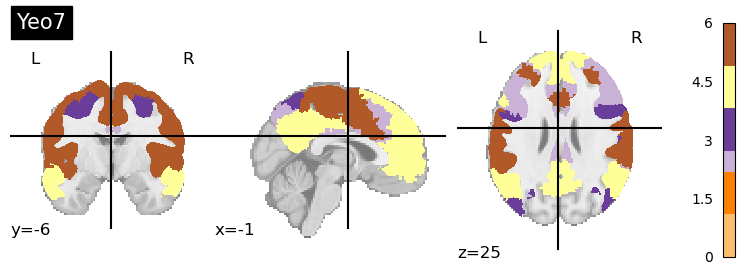

 Atlas Dim=(182, 218, 182, 1)
Flexibility\K_resampled_Yeo7-6RSNs_atlas.nii.gz
no_of_labels = 6
uniqe labels = [0. 2. 3. 4. 5. 6.]
No. of Non-Zero Voxels = 784216
Size of brain Atlas (No. of Voxels) = 7221032
Value: 2.0, Occurrences: 155339, Percentage: 19.81%
Value: 3.0, Occurrences: 122714, Percentage: 15.65%
Value: 4.0, Occurrences: 240978, Percentage: 30.73%
Value: 5.0, Occurrences: 155895, Percentage: 19.88%
Value: 6.0, Occurrences: 109290, Percentage: 13.94%
 Sum of Percentages=100.0


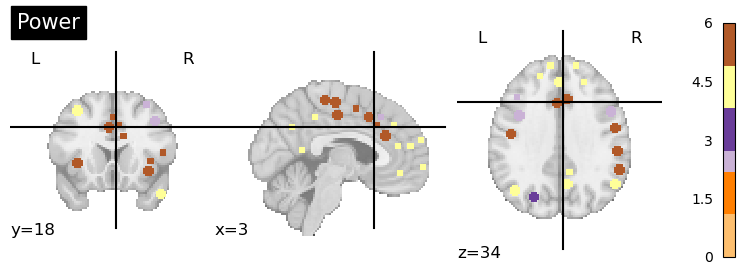

 Atlas Dim=(182, 218, 182)
Flexibility\K_resampled_Power-6RSNs_atlas.nii.gz
no_of_labels = 7
uniqe labels = [0. 1. 2. 3. 4. 5. 6.]
No. of Non-Zero Voxels = 118584
Size of brain Atlas (No. of Voxels) = 7221032
Value: 1.0, Occurrences: 8424, Percentage: 7.10%
Value: 2.0, Occurrences: 16200, Percentage: 13.66%
Value: 3.0, Occurrences: 7128, Percentage: 6.01%
Value: 4.0, Occurrences: 37584, Percentage: 31.69%
Value: 5.0, Occurrences: 22680, Percentage: 19.13%
Value: 6.0, Occurrences: 26568, Percentage: 22.40%
 Sum of Percentages=100.0


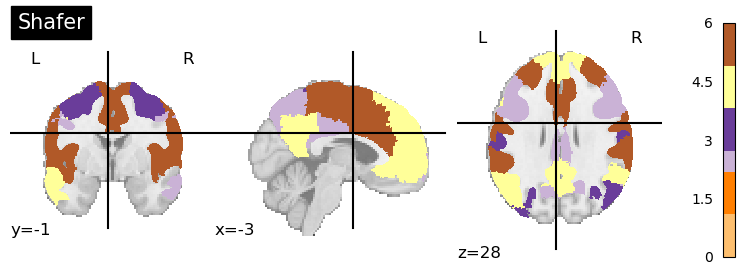

 Atlas Dim=(182, 218, 182)
Flexibility\K_resampled_Shafer-6RSNs_atlas.nii.gz
no_of_labels = 6
uniqe labels = [0. 2. 3. 4. 5. 6.]
No. of Non-Zero Voxels = 789125
Size of brain Atlas (No. of Voxels) = 7221032
Value: 2.0, Occurrences: 161641, Percentage: 20.48%
Value: 3.0, Occurrences: 146041, Percentage: 18.51%
Value: 4.0, Occurrences: 223680, Percentage: 28.35%
Value: 5.0, Occurrences: 128983, Percentage: 16.35%
Value: 6.0, Occurrences: 128780, Percentage: 16.32%
 Sum of Percentages=100.0


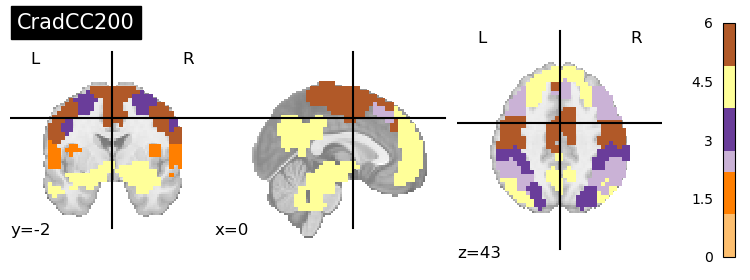

 Atlas Dim=(182, 218, 182)
Flexibility\K_resampled_CradCC200-6RSNs_atlas.nii.gz
no_of_labels = 7
uniqe labels = [0. 1. 2. 3. 4. 5. 6.]
No. of Non-Zero Voxels = 616000
Size of brain Atlas (No. of Voxels) = 7221032
Value: 1.0, Occurrences: 72704, Percentage: 11.80%
Value: 2.0, Occurrences: 90752, Percentage: 14.73%
Value: 3.0, Occurrences: 78976, Percentage: 12.82%
Value: 4.0, Occurrences: 215360, Percentage: 34.96%
Value: 5.0, Occurrences: 102016, Percentage: 16.56%
Value: 6.0, Occurrences: 56192, Percentage: 9.12%
 Sum of Percentages=99.99999999999999


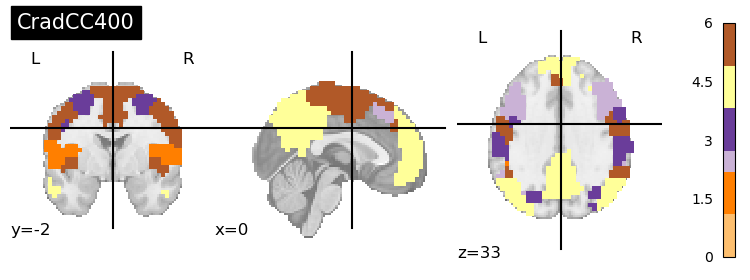

 Atlas Dim=(182, 218, 182)
Flexibility\K_resampled_CradCC400-6RSNs_atlas.nii.gz
no_of_labels = 7
uniqe labels = [0. 1. 2. 3. 4. 5. 6.]
No. of Non-Zero Voxels = 594496
Size of brain Atlas (No. of Voxels) = 7221032
Value: 1.0, Occurrences: 72704, Percentage: 12.23%
Value: 2.0, Occurrences: 90752, Percentage: 15.27%
Value: 3.0, Occurrences: 78976, Percentage: 13.28%
Value: 4.0, Occurrences: 157952, Percentage: 26.57%
Value: 5.0, Occurrences: 102016, Percentage: 17.16%
Value: 6.0, Occurrences: 92096, Percentage: 15.49%
 Sum of Percentages=100.00000000000001


In [10]:
# ------------------------- Display Atlases ----------------------
import numpy as np
from nilearn import plotting
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.image import new_img_like
import nilearn.datasets as datasets

#----- function for plotting-------------------
def plotting_image(img,Title):
    plotting.plot_stat_map(
    img, cmap='Paired',
    title=Title )
    plotting.show()
    

def Display_Img_Labels(atlasFile):
    atlas_img=nib.load(atlasFile)
    atlas_data = atlas_img.get_fdata()
    
    atlas_flat = atlas_data.flatten()
#     atlas_flat=atlas_flat.astype(int)
    
#     atlas_flat[atlas_flat > 0]= 1
#     atlas_flat[atlas_flat < 0]= 0
    # Get the voxel dimensions from the loaded image
    x, y, z = atlas_img.shape[:3]
    print(f" Atlas Dim={atlas_img.shape}")
    # Calculate the total number of voxels
    num_voxels = x * y * z
    
    # Count the non-zero voxels
    non_zero_voxels = np.count_nonzero(atlas_data)
    
    uniq_labels=np.unique(atlas_flat)
#     index = 0
#     if uniq_labels[index]==0:
#         uniq_labels = np.delete(uniq_labels, index)
    
    no_of_labels=len(uniq_labels)
    
    print(atlasFile)
    print('no_of_labels =',no_of_labels)
    print('uniqe labels =',uniq_labels)
    print('No. of Non-Zero Voxels =', non_zero_voxels)
    print('Size of brain Atlas (No. of Voxels) =', num_voxels)
    
#     unique, counts = np.unique(atlas_flat, return_counts=True)
#     result = dict(zip(unique, counts))
#     print(f"result={result}")
#     ---------------------------------------------------------
    atlas_flat = atlas_flat[atlas_flat != 0]  # Remove value 0
    unique, counts = np.unique(atlas_flat, return_counts=True)

    total_count = len(atlas_flat)
    result = dict(zip(unique, counts))

    totalPer=0.0
    for value, count in result.items():
        percentage = (count / total_count) * 100
        print(f"Value: {value}, Occurrences: {count}, Percentage: {percentage:.2f}%")
        totalPer +=percentage
        
    print(f" Sum of Percentages={totalPer}")
# -------------------------------------------------------------------------------------    
import re

def getSub(org_str):
    match = re.search(r'_([^_-]+)-', org_str)
    if match:
        return match.group(1)
    else:
        return None


atlas_file1='Flexibility\K_resampled_Yeo7-6RSNs_atlas.nii.gz'
atlas_file2='Flexibility\K_resampled_Power-6RSNs_atlas.nii.gz'
atlas_file3='Flexibility\K_resampled_Shafer-6RSNs_atlas.nii.gz'
atlas_file4='Flexibility\K_resampled_CradCC200-6RSNs_atlas.nii.gz'
atlas_file5='Flexibility\K_resampled_CradCC400-6RSNs_atlas.nii.gz'

atlas_filenames = [atlas_file1, atlas_file2, atlas_file3, atlas_file4, atlas_file5] 
for atlasfile in atlas_filenames:
    plotting_image(atlasfile,getSub(atlasfile))
    Display_Img_Labels(atlasfile)


In [9]:
import re

def getSub(org_str):
    match = re.search(r'_([^_-]+)-', org_str)
    if match:
        return match.group(1)
    else:
        return None

# Example usage
org_str ='Flexibility\K_resampled_CradCC400-6RSNs_atlas.nii.gz' # 'Flexibility\K_resampled_Yeo7-6RSNs_atlas.nii.gz'
sub_str = getSub(org_str)

print(sub_str)


CradCC400


In [8]:
# ------- Save File --------
import numpy as np

# ... Your existing code ...

# Save the average matrix to a file
np.save('average_matrixB_2.npy', average_p_matrixB_2)
print(f" Done ")
# ... Later in your code or another script ...

# Load the average matrix
# loaded_average_matrixB_2 = np.load('average_matrixB_2.npy')


 Done 


In [2]:
# ------------ Load File ------------
import numpy as np
# Load the average matrix
loaded_average_matrixB_2 = np.load('average_matrixB_2.npy')

In [6]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

def dendo_matrix(matrix):
    # Perform hierarchical clustering for the matrix
    linkage_matrix = sch.linkage(matrix, method='average')  # You can choose a different linkage method----  average  ward

    # Display dendrogram for the matrix
    plt.figure(figsize=(8, 6))
    sch.dendrogram(linkage_matrix, labels=np.arange(1, matrix.shape[0] + 1))
    plt.title('Hierarchical Clustering Dendrogram for Matrix')
    plt.xlabel('Matrix Index')
    plt.ylabel('Distance')
    plt.show()
    
    from scipy.cluster.hierarchy import fcluster

    # Cut the tree at a certain height to get clusters
    threshold_distance = 0.75  # Adjust this based on your dendrogram
    clusters = fcluster(linkage_matrix, t=threshold_distance, criterion='distance')

    # Display the clustered data
#     print("Cluster Assignments:", clusters)
    return clusters


# print(f"{loaded_average_matrixB_2}")
clusters=dendo_matrix(loaded_average_matrixB_2)

MemoryError: Unable to allocate 89.1 GiB for an array with shape (109350, 109350) and data type float64

In [41]:
def bytes_to_gb(bytes):
    giga_bytes = bytes / (1024 ** 3)
    return giga_bytes

# Example usage:
num_bytes = 109350*109350                                                    # gigabytes in bytes
result = bytes_to_gb(num_bytes)
print(f"{num_bytes} bytes is equal to {result} gigabytes.")


11957422500 bytes is equal to 11.136217508465052 gigabytes.


In [18]:
import numpy as np

# Assuming you have a matrix (replace this with your actual matrix)
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Extract the main diagonal
main_diagonal = np.diag(matrix)

# Convert the main diagonal to a vector
diagonal_vector = np.ravel(main_diagonal)

# Alternatively, you can use np.diagonal directly to get a view of the diagonal
# diagonal_vector = np.diagonal(matrix)

# Display the result
print("Matrix:")
print(matrix)
print("\nMain Diagonal:")
print(main_diagonal)
print("\nDiagonal Vector:")
print(diagonal_vector)


Matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Main Diagonal:
[1 5 9]

Diagonal Vector:
[1 5 9]


In [1]:
import numpy as np
def flexibility_Voxels(S):
    
    numSlices = S.shape[0]  # Assuming 'numSlices' is known or defined elsewhere
    totalChanges = np.zeros(S.shape[1])  # Initialize totalChanges with zeros

    # Preprocessing step to check and replace all-zero locations with -1
    all_zero_location = np.all(S == 0, axis=0)
    S[:, all_zero_location] = -1

    
    for s in range(numSlices):
#         print('-----------------------------------------------')
#         print(f"s={s}")
        otherSlices = np.arange(numSlices) + 1
#         print(f"1otherSlices={otherSlices}")
        otherSlices = otherSlices[otherSlices != (s + 1)]  # All slices but the current one
#         print(f"2otherSlices={otherSlices}")
        totalChanges += np.sum(S[s, :] != S[otherSlices - 1, :], axis=0)
#         print(f"sum={np.sum(S[s, :] != S[otherSlices - 1, :], axis=0)}")
#         print(f"totalChanges={totalChanges}")
#     print(totalChanges)
    finalArr=totalChanges/(numSlices*(numSlices-1))
#     print(finalArr)
    finalArr[finalArr==0]=0.01
#     print(all_zero_location)
    finalArr[all_zero_location] = 0
    return finalArr
# --------------------------------------------------
S=np.array([[0,1,2,3,4,5,6,0],
            [0,1,2,0,4,5,0,0],
            [0,1,2,3,0,5,3,0]])
F_data=flexibility_Voxels(S)
print(f"flexibility={F_data}")

[ True False False False False False False  True]
flexibility=[0.         0.01       0.01       0.66666667 0.66666667 0.01
 1.         0.        ]


In [9]:
print(totalChanges/(numSlices*(numSlices-1)))

[0.         0.         0.66666667 0.66666667 0.         1.        ]


In [ ]:
# ------------ Algorithm -------------------------
import numpy as np

# Assuming 'S' is a 2D numpy array with numSlices rows and columns

numSlices = S.shape[0]  # Assuming 'numSlices' is known or defined elsewhere
totalChanges = np.zeros(S.shape[1])  # Initialize totalChanges with zeros

for s in range(numSlices):
    otherSlices = np.arange(numSlices) + 1
    otherSlices = otherSlices[otherSlices != (s + 1)]  # All slices but the current one
    totalChanges += np.sum(S[s, :] != S[otherSlices - 1, :], axis=0)

print(totalChanges)


In [54]:
import numpy as np
from nilearn import plotting
import numpy as np
import pandas as pd
import nibabel as nib
from nilearn.image import new_img_like
import nilearn.datasets as datasets
import nibabel as nib
import numpy as np

def load_nii_image(filename):
    img = nib.load(filename)
    data = img.get_fdata()
    # Convert 4-dim to a 3-dimensional array
    if data.ndim == 4:
        data = data.squeeze()
    print(f"Atlas Name={filename} Size={data.shape}")
    return data
# --------------------------------------------------------------------

def Convert_3DAtlases_2_Rows(atlas_filenames):
    AtlasesList = [load_nii_image(filename) for filename in atlas_filenames]
   # Stack the 5 atlases together to create a 4D array (5, 3, 3, 3)
    # atlas_4d = np.stack([atlas_1, atlas_2, atlas_3, atlas_4, atlas_5])
    atlas_4d = np.stack([at for at in AtlasesList])

    N=len(atlas_filenames)
    # Flatten each 3D atlas to create a 1D array for each atlas
    atlas_1d = atlas_4d.reshape(N, -1)

    # Print the 1D array representation of each atlas
#     for i, atlas in enumerate(atlas_1d):
#         print(f"Atlas {i + 1} - 1D Array:")
#         print(atlas)
#         print()

    # Optionally, if you want to put each 1D array in a 2D array as rows
    atlas_2d = np.vstack(atlas_1d)

    # Print the 2D array with each atlas as a row
#     print("2D Array with Each Atlas as a Row:")
#     print(atlas_2d)
    return atlas_2d
# ---------------------------------------------------------------------------------------------
# Function to check if all values at a particular location are 0
def all_zeros(values):
    return all(val == 0 for val in values)

# Function to replace all 0s with -1 in a list
def replace_zeros_with_neg1(values):
    return [-1 if val == 0 else val for val in values]

# ----------------------------------------------------------------------------------------------------

In [6]:
# ======================== OK Flexibility Code =====================================
import numpy as np


def Ajust_Values(FinalValues, flexibility):
    
# -----------------------------------------------------
    # Find the indices where flexibility is equal to 0
    zero_indices = np.where(FinalValues == 0.0)

    # Update FinalValues at the zero indices to 0
    FinalValues[zero_indices] = 0.01

# ---------------------------------------------------
    # Find the indices where flexibility is equal to 0
    zero_indices = np.where(flexibility == 0)

    # Update FinalValues at the zero indices to 0
    FinalValues[zero_indices] = 0

#     print(FinalValues)
    return FinalValues
# --------------------------------------------------------
def flexibility_Voxels(S, Wt_Arr):
    
    numSlices = S.shape[0]  # Assuming 'numSlices' is known or defined elsewhere
    totalChanges = np.zeros(S.shape[1])  # Initialize totalChanges with zeros

    # Preprocessing step to check and replace all-zero locations with -1
    all_zero_location = np.all(S == 0, axis=0)
    S[:, all_zero_location] = -1

    WholeArr=None
    ccount=0
    for s in range(numSlices):
        otherSlices = np.arange(numSlices) + 1
        otherSlices = otherSlices[otherSlices != (s + 1)]  # All slices but the current one
#         print(otherSlices)
        ccount +=len(otherSlices)
        Arr1=otherSlices
        totalChanges += np.sum(S[s, :] != S[otherSlices - 1, :], axis=0)
        status=(S[s, :] == S[otherSlices - 1, :])
#         print(f"status={status}")
        
        
        # Convert the 2-D Boolean array to binary
        status_binary = status.astype(int)
#         print(status_binary)
        # Define the weights array
#         Wt_Arr = np.array([0.1, 0.5, 0.4])

        # Create a weighted array based on Arr1
        weighted_arr = Wt_Arr[Arr1 - 1]  # Subtract 1 to adjust for 0-based indexing
#         print(weighted_arr)
        # Perform element-wise multiplication using broadcasting
        result = weighted_arr[:, np.newaxis] * status_binary
#         print(result)
        if WholeArr is None:
            WholeArr =result
        else:
            WholeArr = np.vstack((WholeArr, result))
#             print(f"WholeArr\n{WholeArr}")

    # Calculate the sum of each row with others
    row_sums = np.sum(WholeArr, axis=0)
    print(f"row_sums=\n{row_sums}")
    FinalValues= row_sums/numSlices
    print(f"FinalValues=\n{FinalValues}")
    
    
    flexiblityArr=totalChanges/(numSlices*(numSlices-1))
    flexiblityArr[flexiblityArr==0]=0.01
    flexiblityArr[all_zero_location] = 0
    
    return flexiblityArr,FinalValues, WholeArr
# ---------------------------------------------------------
def save_nii_image(filename, data, reference_file):
    reference_img= nib.load(reference_file)
    data= data.reshape(reference_img.shape)
    new_img = nib.Nifti1Image(data, reference_img.affine)
    nib.save(new_img, filename)
# =====================================================================================================
S=np.array([[0,1,2,3,4,5,6,0],
            [0,1,3,0,4,5,0,0],
            [0,1,5,3,0,5,3,0],
            [0,1,2,3,2,5,7,0],
            [0,1,4,0,2,5,4,0]])
# --- Weight for each row (Atlas)
# Wt_Arr = np.array([0.1, 0.3, 0.4, 0.2])
Wt_Arr = np.array([0.235, 0.234, 0.066, 0.233, 0.232])


print("========================= Original Data ===============================")
print(f"\nAtlases\n{S}")
print(f"\nWeight Array for Atlases\n{Wt_Arr}")
flex_data, finalValues, WholeArr = flexibility_Voxels(S, Wt_Arr)

print("======================== Process Data ================================")
print(f"WholeArr\n{WholeArr}")
print(f"flexibility=\n{flex_data}\nfinalValues=\n{finalValues}")
FinalValues= Ajust_Values(finalValues, flex_data)

print(f"After Considering Background FinalValues=\n{FinalValues}")

# ------------------------ for Real Atlases Data -------------------------
# input_dir=r'C:\Users\IT-Department\LLN Code Python\2nd Code\Work4ThesisInshallah\Output_NOIs'
# atlases=[ input_dir +'\\'+'Kresampled_CradCC200-6RSNs_atlas.nii.gz',
#           input_dir +'\\'+'Kresampled_CradCC400-6RSNs_atlas.nii.gz',
#           input_dir +'\\'+'Kresampled_Power-6RSNs_atlas.nii.gz',
#           input_dir +'\\'+'Kresampled_Shafer-6RSNs_atlas.nii.gz',
#           input_dir +'\\'+'Kresampled_Yeo7-6RSNs_atlas.nii.gz'
#          ]
#-----------------------------------------------------------------------------------------------         
# 
# Replace the file paths with the actual file paths of your atlases
# atlas_filenames = [atlas_file1, atlas_file2, atlas_file4, atlas_file5] #atlas_file3,
# AtList=[atlas_1,atlas_2,atlas_3,atlas_4,atlas_5]

# --- Weight for each row (Atlas)
# sequence = [cc200, cc400, power, scafer, yeo7]
# Wt_Arr = np.array([0.235, 0.234, 0.066, 0.233, 0.232])

# S_2D=Convert_3DAtlases_2_Rows(atlases)
# # F_data=flexibility_Voxels(S_2D)
# flex_data, finalValues, WholeArr = flexibility_Voxels(S_2D, Wt_Arr)
# FinalValues= Ajust_Values(finalValues, flex_data)


# reference_file=input_dir +'\\'+ 'Kresampled_CradCC200-6RSNs_atlas.nii.gz'
# FName=input_dir +'\\'+ 'flex_Weight_new.nii.gz'
# save_nii_image(FName, FinalValues, reference_file)
# FName2=input_dir +'\\'+ 'flexibility_new.nii.gz'
# save_nii_image(FName2, flex_data, reference_file)

# plotting_image(FName,"Flexibility Weight Atlas")
# Display_Img_Labels(FName)

# plotting_image(FName2,"Flexibility Atlas")
# Display_Img_Labels(FName2)

========================= Original Data ===============================

Atlases
[[0 1 2 3 4 5 6 0]
 [0 1 3 0 4 5 0 0]
 [0 1 5 3 0 5 3 0]
 [0 1 2 3 2 5 7 0]
 [0 1 4 0 2 5 4 0]]

Weight Array for Atlases
[0.235 0.234 0.066 0.233 0.232]
row_sums=
[4.    4.    0.468 1.534 0.934 4.    0.    4.   ]
FinalValues=
[0.8    0.8    0.0936 0.3068 0.1868 0.8    0.     0.8   ]
======================== Process Data ================================
WholeArr
[[0.234 0.234 0.    0.    0.234 0.234 0.    0.234]
 [0.066 0.066 0.    0.066 0.    0.066 0.    0.066]
 [0.233 0.233 0.233 0.233 0.    0.233 0.    0.233]
 [0.232 0.232 0.    0.    0.    0.232 0.    0.232]
 [0.235 0.235 0.    0.    0.235 0.235 0.    0.235]
 [0.066 0.066 0.    0.    0.    0.066 0.    0.066]
 [0.233 0.233 0.    0.    0.    0.233 0.    0.233]
 [0.232 0.232 0.    0.232 0.    0.232 0.    0.232]
 [0.235 0.235 0.    0.235 0.    0.235 0.    0.235]
 [0.234 0.234 0.    0.    0.    0.234 0.    0.234]
 [0.233 0.233 0.    0.233 0.    0.233 0.    

combined_array size=(5, 25)
========================= Original Data ===============================

Atlases
[[1 1 1 2 2 1 1 2 2 3 1 1 2 3 3 4 4 4 3 3 4 4 4 4 3]
 [1 1 1 2 2 1 1 2 2 2 4 1 2 3 3 4 4 4 3 3 4 4 4 4 3]
 [1 1 1 1 2 1 1 1 2 2 1 1 2 2 3 4 4 4 3 3 4 4 4 3 3]
 [1 1 1 2 2 1 1 2 2 3 1 1 2 3 3 4 4 4 3 3 4 4 4 3 3]
 [1 1 1 1 2 1 1 1 2 3 1 1 2 3 3 1 4 4 3 3 4 4 4 4 3]]

Weight Array for Atlases
[0.235 0.234 0.066 0.233 0.232]
row_sums=
[4.    4.    4.    1.702 4.    4.    4.    1.702 4.    1.7   2.298 4.
 4.    2.802 4.    2.304 4.    4.    4.    4.    4.    4.    4.    1.701
 4.   ]
FinalValues=
[0.8    0.8    0.8    0.3404 0.8    0.8    0.8    0.3404 0.8    0.34
 0.4596 0.8    0.8    0.5604 0.8    0.4608 0.8    0.8    0.8    0.8
 0.8    0.8    0.8    0.3402 0.8   ]
======================== Process Data ================================
WholeArr
[[0.234 0.234 0.234 0.234 0.234 0.234 0.234 0.234 0.234 0.    0.    0.234
  0.234 0.234 0.234 0.234 0.234 0.234 0.234 0.234 0.234 0.234 0.2

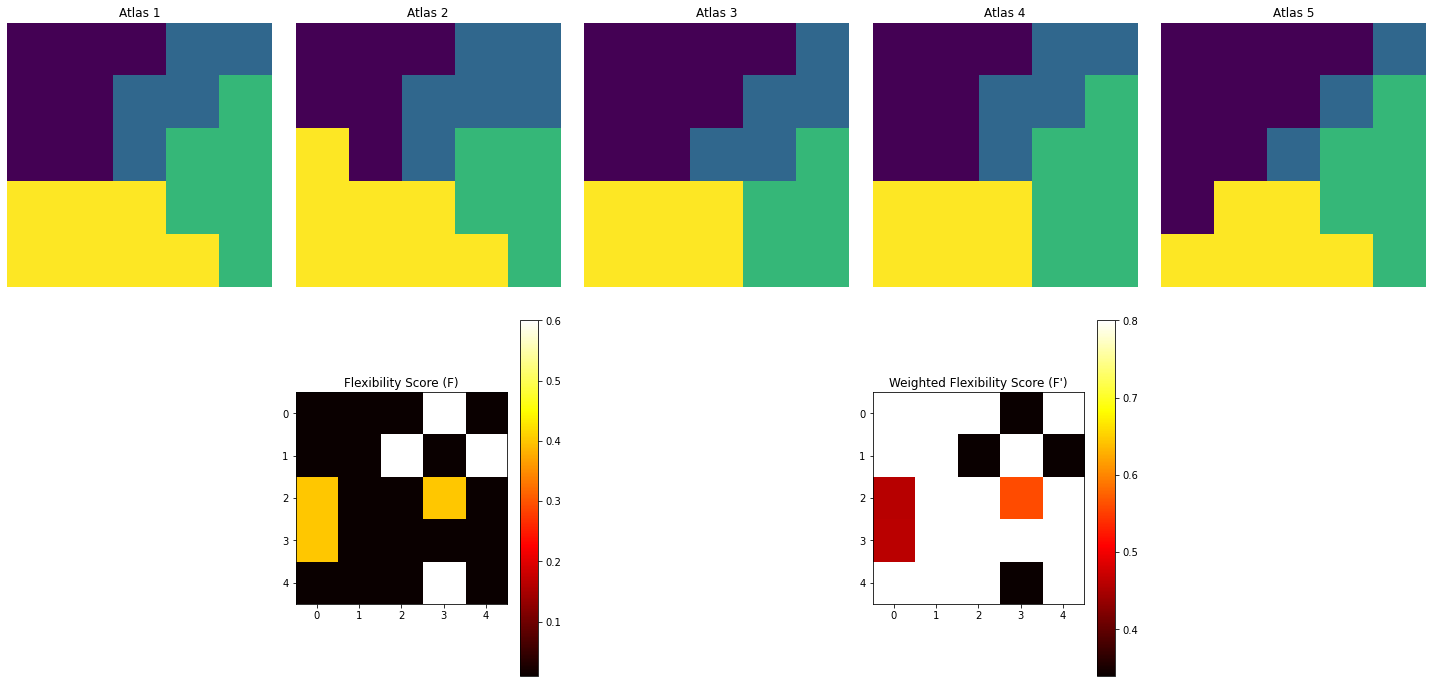

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Let's create a mock visualization of five brain atlases with differing voxel allocations
# For simplicity, we'll assume a 2D cross-section of the brain and a small set of voxels.

# Create mock data for brain atlases - in a real scenario, this would be complex 3D data
# For demonstration, we're using a simplified 2D grid where each cell represents a voxel
# allegiance to a particular region (marked by different integers).
atlas1 = np.array([[1, 1, 1, 2, 2],
                   [1, 1, 2, 2, 3],
                   [1, 1, 2, 3, 3],
                   [4, 4, 4, 3, 3],
                   [4, 4, 4, 4, 3]])

atlas2 = np.array([[1, 1, 1, 2, 2],
                   [1, 1, 2, 2, 2],
                   [4, 1, 2, 3, 3],
                   [4, 4, 4, 3, 3],
                   [4, 4, 4, 4, 3]])

atlas3 = np.array([[1, 1, 1, 1, 2],
                   [1, 1, 1, 2, 2],
                   [1, 1, 2, 2, 3],
                   [4, 4, 4, 3, 3],
                   [4, 4, 4, 3, 3]])

atlas4 = np.array([[1, 1, 1, 2, 2],
                   [1, 1, 2, 2, 3],
                   [1, 1, 2, 3, 3],
                   [4, 4, 4, 3, 3],
                   [4, 4, 4, 3, 3]])

atlas5 = np.array([[1, 1, 1, 1, 2],
                   [1, 1, 1, 2, 3],
                   [1, 1, 2, 3, 3],
                   [1, 4, 4, 3, 3],
                   [4, 4, 4, 4, 3]])


import numpy as np

# Assuming mat1, mat2, mat3, mat4, mat5 are your 5 matrices
vec1 = atlas1.reshape(-1)  # Convert matrix to a vector
vec2 = atlas2.reshape(-1)
vec3 = atlas3.reshape(-1)
vec4 = atlas4.reshape(-1)
vec5 = atlas5.reshape(-1)

Wt_Arr = np.array([0.235, 0.234, 0.066, 0.233, 0.232])
combined_array = np.vstack((vec1, vec2, vec3, vec4, vec5))
print(f"combined_array size={combined_array.shape}")

S=combined_array

print("========================= Original Data ===============================")
print(f"\nAtlases\n{S}")
print(f"\nWeight Array for Atlases\n{Wt_Arr}")
flex_data, finalValues, WholeArr = flexibility_Voxels(S, Wt_Arr)
print("======================== Process Data ================================")
print(f"WholeArr\n{WholeArr}")
print(f"flexibility=\n{flex_data}\nfinalValues=\n{finalValues}")
FinalValues= Ajust_Values(finalValues, flex_data)

print(f"After Considering Background FinalValues=\n{FinalValues}")


flex_matrix = flex_data.reshape(5, 5)
final_matrix = FinalValues.reshape(5, 5)

# # Calculate a mock 'changes' matrix where 1 represents a change in allegiance and 0 represents no change
# changes = np.array([np.zeros_like(atlas1),  # Mock changes for atlas comparison A1 to A0 (initial comparison)
#                     (atlas1 != atlas2).astype(int),  # Changes from A1 to A2
#                     (atlas2 != atlas3).astype(int),  # Changes from A2 to A3
#                     (atlas3 != atlas4).astype(int),  # Changes from A3 to A4
#                     (atlas4 != atlas5).astype(int)]) # Changes from A4 to A5

# # Calculate the basic flexibility score F for each voxel (ignoring total possible changes since it's constant)
# F = changes.sum(axis=0) / (changes.shape[0] - 1)  # Normalize by number of atlas comparisons

# # Define arbitrary weights for each atlas (in a real case, these would be determined by some criteria)
# weights = np.array([0.1, 0.2, 0.25, 0.3, 0.15])  # Weights for atlas1 to atlas5

# # Calculate the weighted flexibility score F' for each voxel
# F_prime = (changes * weights[:, np.newaxis, np.newaxis]).sum(axis=0) / weights.sum()

# Plot the flexibility scores as heatmaps
fig, ax = plt.subplots(2, 5, figsize=(20, 10))  # Set up a figure with subplots for each atlas and the result

# Plot each atlas as a heatmap
atlases = [atlas1, atlas2, atlas3, atlas4, atlas5]
for i, atlas in enumerate(atlases):
    ax[0,i].imshow(atlas, cmap='viridis', aspect='equal')
    ax[0,i].set_title(f'Atlas {i+1}')
   
    ax[0,i].axis('off')
    # Add grid lines
#     ax[0, i].grid(True, which='both', linestyle='-', linewidth=1, color='k')

# Plot the flexibility score heatmap
cax = ax[1,1].imshow(flex_matrix, cmap='hot', aspect='equal')
fig.colorbar(cax, ax=ax[1,1], orientation='vertical')
ax[1,1].set_title('Flexibility Score (F)')
ax[1,1].axis('on')
# Add grid lines
# ax[1, 1].grid(True, which='both', linestyle='-', linewidth=1, color='k')

# Plot the Final score heatmap
cax = ax[1,3].imshow(final_matrix, cmap='hot', aspect='equal')
fig.colorbar(cax, ax=ax[1,3], orientation='vertical')
ax[1,3].set_title("Weighted Flexibility Score (F\')")
# ax[1,3].axis('off')
# Add grid lines
# ax[1, 3].grid(True, which='both', linestyle='-', linewidth=1, color='k')


ax[1, 0].axis('off')
ax[1, 2].axis('off')
# ax[1, 3].axis('off')
ax[1, 4].axis('off')
plt.tight_layout()
plt.grid(axis = 'y')
plt.grid(axis = 'x')
plt.show()

S size=(5, 10)
========================= Original Data ===============================

Atlases
[[1 1 1 1 1]
 [2 1 0 2 1]
 [5 4 2 1 3]
 [1 0 0 1 1]
 [1 1 1 0 0]
 [0 1 0 1 0]
 [1 0 1 0 1]
 [0 0 0 0 0]
 [1 1 0 1 0]
 [0 1 1 1 0]]

Weight Array for Atlases
[0.235 0.234 0.066 0.233 0.232]
row_sums=
[4.    0.934 0.    1.7   1.535 1.533 1.533 4.    1.702 1.533]
FinalValues=
[0.8    0.1868 0.     0.34   0.307  0.3066 0.3066 0.8    0.3404 0.3066]
======================== Process Data ================================
WholeArr
[[0.234 0.    0.    0.    0.234 0.    0.    0.234 0.234 0.   ]
 [0.066 0.    0.    0.    0.066 0.066 0.066 0.066 0.    0.   ]
 [0.233 0.233 0.    0.233 0.    0.    0.    0.233 0.233 0.   ]
 [0.232 0.    0.    0.232 0.    0.232 0.232 0.232 0.    0.232]
 [0.235 0.    0.    0.    0.235 0.    0.    0.235 0.235 0.   ]
 [0.066 0.    0.    0.066 0.066 0.    0.    0.066 0.    0.066]
 [0.233 0.    0.    0.    0.    0.233 0.233 0.233 0.233 0.233]
 [0.232 0.232 0.    0.    0.    0.   

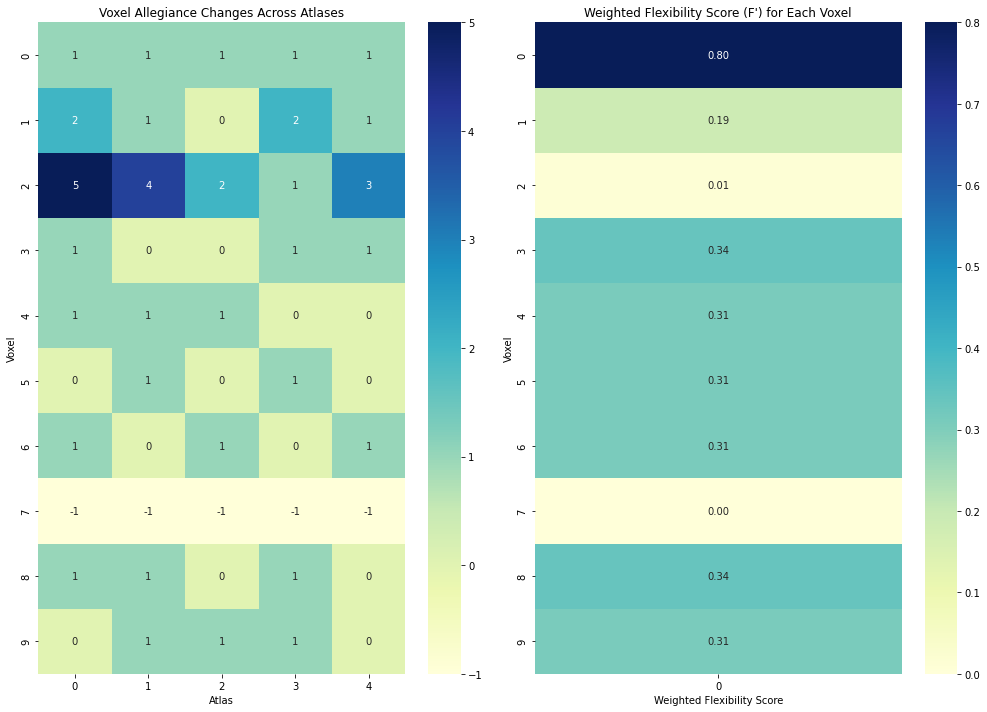

(array([0.25, 1.75, 2.75, 0.75, 0.5 , 1.  , 1.25, 0.  , 1.  , 0.5 ]),
 array([0.235, 1.468, 2.238, 0.702, 0.468, 0.765, 1.   , 0.   , 0.766,
        0.466]))

In [27]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the hypothetical allegiance data for voxels across atlases
voxel_allegiance = np.array([
    [1, 1, 1, 1, 1],  # V1    All values same in Atlases
    [2, 1, 0, 2, 1],  # V2
    [5, 4, 2, 1, 3],  # V3    All values different in Atlases
    [1, 0, 0, 1, 1],  # V4
    [1, 1, 1, 0, 0],  # V5
    [0, 1, 0, 1, 0],  # V6
    [1, 0, 1, 0, 1],  # V7
    [0, 0, 0, 0, 0],  # V8    All values same in Atlases (Background)
    [1, 1, 0, 1, 0],  # V9
    [0, 1, 1, 1, 0],  # V10
])

S= voxel_allegiance.transpose()
Wt_Arr = np.array([0.235, 0.234, 0.066, 0.233, 0.232])

print(f"S size={S.shape}")

print("========================= Original Data ===============================")
print(f"\nAtlases\n{S.transpose()}")
print(f"\nWeight Array for Atlases\n{Wt_Arr}")
flex_data, finalValues, WholeArr = flexibility_Voxels(S, Wt_Arr)
print("======================== Process Data ================================")
print(f"WholeArr\n{WholeArr}")
print(f"flexibility=\n{flex_data}\nfinalValues=\n{finalValues}")
FinalValues= Ajust_Values(finalValues, flex_data)

print(f"After Considering Background FinalValues=\n{FinalValues}")



# # Define the weights for each atlas
# atlas_weights = np.array([0.235, 0.234, 0.066, 0.233, 0.232])

# # Calculate the number of changes for the basic flexibility coefficient
# # Changes occur where there's a difference between subsequent atlases
# voxel_changes = np.diff(voxel_allegiance, axis=1)
# # We calculate changes as 0 where allegiance is retained, and 1 where it changes
# voxel_changes = np.abs(voxel_changes)  # Convert changes to absolute to get 0 and 1
# voxel_changes = np.hstack([voxel_allegiance[:, 0:1], voxel_changes])  # add allegiance from A1 as initial state

# # Calculate the Basic Flexibility Coefficient (F) for each voxel
# # Sum the total changes and divide by the total possible changes (number of atlases - 1)
# F = voxel_changes.sum(axis=1) / (voxel_allegiance.shape[1] - 1)

# # Calculate the Enhanced Flexibility Score (F') for each voxel using weights
# F_prime_numerator = (voxel_changes * atlas_weights).sum(axis=1)
# F_prime_denominator = atlas_weights.sum()
# F_prime = F_prime_numerator / F_prime_denominator

# Create heatmaps
plt.figure(figsize=(14, 10))

# Heatmap for Basic Flexibility Coefficient (F)
plt.subplot(1, 2, 1)
sns.heatmap(voxel_allegiance, annot=True, cmap="YlGnBu", cbar=True, fmt="d")   #voxel_changes
plt.title('Voxel Allegiance Changes Across Atlases')
plt.xlabel('Atlas')
plt.ylabel('Voxel')

# Heatmap for Weighted Flexibility Coefficient (F')
plt.subplot(1, 2, 2)
# Reshape F_prime to be a column vector for heatmap compatibility
sns.heatmap(FinalValues.reshape(-1, 1), annot=True, cmap="YlGnBu", cbar=True, fmt=".2f")  #F_prime.reshape(-1, 1)
plt.title('Weighted Flexibility Score (F\') for Each Voxel')
plt.xlabel('Weighted Flexibility Score')
plt.ylabel('Voxel')

plt.tight_layout()
plt.show()

# Return the calculated coefficients for further analysis if needed
(F, F_prime)

In [48]:
import numpy as np



FinalValues = np.array([0.66666667, 0.66666667, 0.66666667, 0.16666667, 0.2,        0.66666667, 0., 0.66666667])
flexibility = np.array([0.,         0.01,       0.01,       0.66666667, 0.66666667, 0.01,       1., 0.])

FinalValues= Ajust_Values(FinalValues, flexibility)
print(FinalValues)

[0.         0.66666667 0.66666667 0.16666667 0.2        0.66666667
 0.01       0.        ]


In [11]:
import numpy as np

# Define the arrays
Arr1 = np.array([2, 3])
Arr2 = np.array([[True, True, True, False, True, True, False, True],
                 [True, True, True, True, False, True, False, True]])

# Convert the 2-D Boolean array to binary
Arr2_binary = Arr2.astype(int)
print(Arr2_binary)
# Perform element-wise multiplication using broadcasting
result = Arr1[:, np.newaxis] * Arr2_binary

print(result)

# I have weight's array Wt_Arr=[0.1, 0.5, 0.4]
# depending on Arr1, 2 in Arr1 will take weight 0.5(the second location)  3 in Arr1 will take weight of third location (0.4)
# then weight corresponding to Arr1 will be [0.5, 0.4] and I need to multiply with  result = Arr1[:, np.newaxis] * Arr2_binary

[[1 1 1 0 1 1 0 1]
 [1 1 1 1 0 1 0 1]]
[[2 2 2 0 2 2 0 2]
 [3 3 3 3 0 3 0 3]]


In [18]:
import numpy as np

# Define the arrays
Arr1 = np.array([1, 3])
Arr2 = np.array([[True, True, True, False, True, True, False, True],
                 [True, True, True, True, False, True, False, True]])

# Convert the 2-D Boolean array to binary
Arr2_binary = Arr2.astype(int)
print(Arr2_binary)
# Define the weights array
Wt_Arr = np.array([0.1, 0.5, 0.4])

# Create a weighted array based on Arr1
weighted_arr = Wt_Arr[Arr1 - 1]  # Subtract 2 to adjust for 0-based indexing
print(weighted_arr)
# Perform element-wise multiplication using broadcasting
result = weighted_arr[:, np.newaxis] * Arr2_binary

print(result)


[[1 1 1 0 1 1 0 1]
 [1 1 1 1 0 1 0 1]]
[0.1 0.4]
[[0.1 0.1 0.1 0.  0.1 0.1 0.  0.1]
 [0.4 0.4 0.4 0.4 0.  0.4 0.  0.4]]


In [16]:
import numpy as np

Arr1 = np.array([2, 3])
Wt_Arr = np.array([0.1, 0.5, 0.4])

# Use Arr1 as indices to extract values from Wt_Arr
Weight = Wt_Arr[Arr1 - 1]

# Subtract 1 from Arr1 since indices are zero-based in Python
# If you want to keep the original Arr1 values, you can omit the "- 1" part

print(Weight)


[0.5 0.4]


In [24]:
import numpy as np

# Define your initial arrays
Arr1 = np.array([[0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.1],
                 [0.4, 0.4, 0.4, 0.4, 0.0, 0.4, 0.0, 0.4]])

Arr2 = np.array([[0.1, 0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.1],
                 [0.4, 0.4, 0.4, 0.4, 0.0, 0.4, 0.0, 0.4]])

# Stack the arrays vertically to merge them
ArrNew = np.vstack((Arr1, Arr2))
# print(f"ArrNew=\n{ArrNew}")
# Calculate the sum of each row with others
row_sums = np.sum(ArrNew, axis=0)

print("Merged Array:")
print(ArrNew)
print("\nRow Sums:")
print(row_sums)


Merged Array:
[[0.1 0.1 0.1 0.  0.1 0.1 0.  0.1]
 [0.4 0.4 0.4 0.4 0.  0.4 0.  0.4]
 [0.1 0.1 0.1 0.  0.1 0.1 0.  0.1]
 [0.4 0.4 0.4 0.4 0.  0.4 0.  0.4]]

Row Sums:
[1.  1.  1.  0.8 0.2 1.  0.  1. ]
